In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('WorkOrderPostStats2.csv')
df.head()

,PROCESS,WORK_ORDER_NAME,NUMBER_OF_EDITS,START_EDITING,STOP_EDITING,POSTING_DURATION,POSTING_START,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NE,NE.0326_0001,39.0,NaN,NaN,00:00:09,3/28/2020 9:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NE,NE.0327_001,129.0,NaN,NaN,00:00:39,3/29/2020 19:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NE,NE.0328_002,1.0,NaN,NaN,00:00:07,3/29/2020 20:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NE,NE.65989,1.0,NaN,NaN,00:00:10,3/26/2020 21:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NE,NE.65990,1.0,NaN,NaN,00:00:08,3/27/2020 9:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df[['PROCESS','WORK_ORDER_NAME','NUMBER_OF_EDITS','POSTING_START','POSTING_DURATION']]

In [4]:
df.head()

,PROCESS,WORK_ORDER_NAME,NUMBER_OF_EDITS,POSTING_START,POSTING_DURATION
0,NE,NE.0326_0001,39.0,3/28/2020 9:00,00:00:09
1,NE,NE.0327_001,129.0,3/29/2020 19:59,00:00:39
2,NE,NE.0328_002,1.0,3/29/2020 20:22,00:00:07
3,NE,NE.65989,1.0,3/26/2020 21:26,00:00:10
4,NE,NE.65990,1.0,3/27/2020 9:00,00:00:08


In [159]:
df['POSTING_START'] = pd.to_datetime(df.POSTING_START)
df.dtypes

PROCESS                    object
WORK_ORDER_NAME            object
NUMBER_OF_EDITS           float64
POSTING_START      datetime64[ns]
duration                  float64
dtype: object

In [8]:
df['duration'] = pd.to_timedelta(df.POSTING_DURATION)
df['duration'] = df['duration'].dt.total_seconds()
df.head()

,PROCESS,WORK_ORDER_NAME,NUMBER_OF_EDITS,POSTING_START,POSTING_DURATION,duration
0,NE,NE.0326_0001,39.0,2020-03-28 09:00:00,00:00:09,9.0
1,NE,NE.0327_001,129.0,2020-03-29 19:59:00,00:00:39,39.0
2,NE,NE.0328_002,1.0,2020-03-29 20:22:00,00:00:07,7.0
3,NE,NE.65989,1.0,2020-03-26 21:26:00,00:00:10,10.0
4,NE,NE.65990,1.0,2020-03-27 09:00:00,00:00:08,8.0


In [9]:
df.drop('POSTING_DURATION',axis=1,inplace=True)
df = df[df.NUMBER_OF_EDITS !=1]

In [12]:
grouped = df.groupby([df['POSTING_START'].dt.date]).sum()
grouped

,NUMBER_OF_EDITS,duration
POSTING_START,,
2020-03-23,387573.0,12204.0
2020-03-24,437059.0,25522.0
2020-03-26,550831.0,33354.0
2020-03-27,579633.0,38809.0
2020-03-28,1652135.0,58738.0
2020-03-29,2065738.0,67327.0
2020-03-30,1412257.0,35411.0
2020-03-31,77835.0,2455.0


In [160]:
grouped['duration_remaining_in_day']= 61200 - grouped['duration']
grouped

,NUMBER_OF_EDITS,duration,duration_remaining_in_day
POSTING_START,,,
2020-03-23,387573.0,12204.0,48996.0
2020-03-24,437059.0,25522.0,35678.0
2020-03-26,550831.0,33354.0,27846.0
2020-03-27,579633.0,38809.0,22391.0
2020-03-28,1652135.0,58738.0,2462.0
2020-03-29,2065738.0,67327.0,-6127.0
2020-03-30,1412257.0,35411.0,25789.0
2020-03-31,77835.0,2455.0,58745.0


In [161]:
NE = df[df['PROCESS']=='NE'] #122 rows of NE
NE.head()

,PROCESS,WORK_ORDER_NAME,NUMBER_OF_EDITS,POSTING_START,duration,dur_per_edit
0,NE,NE.0326_0001,39.0,2020-03-28 09:00:00,9.0,0.230769
1,NE,NE.0327_001,129.0,2020-03-29 19:59:00,39.0,0.302326
6,NE,NE.DB-1,1256.0,2020-03-31 00:06:00,68.0,0.054140
7,NE,NE.DB-10,1256.0,2020-03-26 23:46:00,72.0,0.057325
8,NE,NE.DB-10,1260.0,2020-03-30 17:05:00,2.0,0.001587


In [16]:
NE['dur_per_edit'] = NE.duration / NE.NUMBER_OF_EDITS 

/Users/jennetta/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [162]:
SDE = df[df['PROCESS']=='SDE']
SDE.head()

,PROCESS,WORK_ORDER_NAME,NUMBER_OF_EDITS,POSTING_START,duration,dur_per_edit
122,SDE,SDE.13484,750.0,2020-03-29 03:00:00,62.0,0.082667
123,SDE,SDE.13486,623.0,2020-03-29 03:01:00,61.0,0.097913
124,SDE,SDE.13487,956.0,2020-03-29 04:02:00,64.0,0.066946
125,SDE,SDE.13489,2089.0,2020-03-29 03:31:00,66.0,0.031594
126,SDE,SDE.13490,1841.0,2020-03-29 03:17:00,64.0,0.034764


In [18]:
SDE['dur_per_edit'] = SDE.duration / SDE.NUMBER_OF_EDITS 

/Users/jennetta/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
SDE[SDE['duration']>300]

,PROCESS,WORK_ORDER_NAME,NUMBER_OF_EDITS,POSTING_START,duration,dur_per_edit
3984,SDE,SDE.50379,419.0,2020-03-26 14:00:00,677.0,1.615752
4002,SDE,SDE.50391,347.0,2020-03-27 14:33:00,398.0,1.146974
8413,SDE,SDE.53541,445.0,2020-03-29 00:59:00,3655.0,8.213483


In [20]:
NE[NE['duration']>300]

,PROCESS,WORK_ORDER_NAME,NUMBER_OF_EDITS,POSTING_START,duration,dur_per_edit


In [21]:
SDE.drop(1528,inplace=True)
SDE.drop(3836,inplace=True)
SDE.drop(7348,inplace=True)

/Users/jennetta/Library/Python/3.7/lib/python/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
SDE_time = (SDE.dur_per_edit.mean() )
NE_time = (NE.dur_per_edit.mean() )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10dfbdc18>]],
      dtype=object)

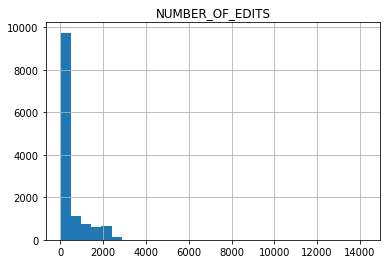

In [23]:
df.hist('NUMBER_OF_EDITS',bins=30)

In [24]:
import matplotlib.pyplot as plt

In [25]:
'''
100 447 
250 291 
500 280 
750 176 
1000 127 
1500 141 
2000 68
2500 35
5000 87
7500 37
10000 25
15000 22
20000 9
'''

'\n100 447 \n250 291 \n500 280 \n750 176 \n1000 127 \n1500 141 \n2000 68\n2500 35\n5000 87\n7500 37\n10000 25\n15000 22\n20000 9\n\nin 1 day\n\n0.08455822729879554 SDE \n0.40973213236668404 NE\n'

In [26]:
num_edits_per_day = 100*447 +250*291 +500*280 +750*176 +1000*127+1500*141+2000*68+2500*35+5000*87+7500*37+10000*25+15000*22+20000*9
num_edits_per_day
# 2.42 mill edits / day

2423950

In [27]:
tot_time = num_edits_per_day/2*SDE_time + num_edits_per_day/2*NE_time

In [28]:
#600,000 sec
tot_time / 61200

2.1580879329002194

In [29]:
SDE[SDE['WORK_ORDER_NAME']=='SDE.53541']

,PROCESS,WORK_ORDER_NAME,NUMBER_OF_EDITS,POSTING_START,duration,dur_per_edit
8413,SDE,SDE.53541,445.0,2020-03-29 00:59:00,3655.0,8.213483


In [30]:
SDE_time

0.07786554383018877

In [31]:
NE_time

0.031109461011902394

In [32]:
NE[NE.duration == NE.duration.max()]

,PROCESS,WORK_ORDER_NAME,NUMBER_OF_EDITS,POSTING_START,duration,dur_per_edit
24,NE,NE.DB-24,4164.0,2020-03-30 23:56:00,141.0,0.033862


In [33]:
NE.dur_per_edit.describe

<bound method NDFrame.describe of 0      0.230769
1      0.302326
6      0.054140
7      0.057325
8      0.001587
         ...   
115    0.006704
116         NaN
117    0.019231
118    0.041026
119    0.051282
Name: dur_per_edit, Length: 116, dtype: float64>

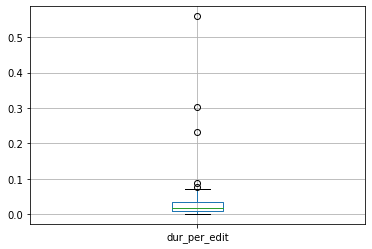

In [35]:
NE.boxplot('dur_per_edit')

In [163]:
#bins are in 500s
#collect all postings in bin x
# find the avg duration per posting for bin x
#do weighted sum 

#0-500,500-1000,1000-2000,2000-5000,>5000
NE.head()

,PROCESS,WORK_ORDER_NAME,NUMBER_OF_EDITS,POSTING_START,duration,dur_per_edit
0,NE,NE.0326_0001,39.0,2020-03-28 09:00:00,9.0,0.230769
1,NE,NE.0327_001,129.0,2020-03-29 19:59:00,39.0,0.302326
6,NE,NE.DB-1,1256.0,2020-03-31 00:06:00,68.0,0.054140
7,NE,NE.DB-10,1256.0,2020-03-26 23:46:00,72.0,0.057325
8,NE,NE.DB-10,1260.0,2020-03-30 17:05:00,2.0,0.001587


In [86]:
NE500 = NE[NE.NUMBER_OF_EDITS < 500]
NE500to1000 = NE[(NE.NUMBER_OF_EDITS > 500) & (NE.NUMBER_OF_EDITS < 1000) ]
NE1000to2000 = NE[(NE.NUMBER_OF_EDITS > 1000) & (NE.NUMBER_OF_EDITS < 2000) ]
NE2000to5000 = NE[(NE.NUMBER_OF_EDITS > 2000) & (NE.NUMBER_OF_EDITS < 5000) ]
NE5000abv = NE[(NE.NUMBER_OF_EDITS > 5000)  ]

SDE500 = SDE[SDE.NUMBER_OF_EDITS < 500]
SDE500to1000 = SDE[(SDE.NUMBER_OF_EDITS > 500) & (SDE.NUMBER_OF_EDITS < 1000) ]
SDE1000to2000 = SDE[(SDE.NUMBER_OF_EDITS > 1000) & (SDE.NUMBER_OF_EDITS < 2000) ]
SDE2000to5000 = SDE[(SDE.NUMBER_OF_EDITS > 2000) & (SDE.NUMBER_OF_EDITS < 5000) ]
SDE5000abv = SDE[(SDE.NUMBER_OF_EDITS > 5000) ]

In [87]:
NE500mean = NE500.duration.mean()
NE500to1000mean = NE500to1000.duration.mean()
NE1000to2000mean = NE1000to2000.duration.mean()
NE2000to5000mean = NE2000to5000.duration.mean()
NE5000abvmean = NE5000abv.duration.mean()

In [88]:
SDE500mean = SDE500.duration.mean()
SDE500to1000mean = SDE500to1000.duration.mean()
SDE1000to2000mean = SDE1000to2000.duration.mean()
SDE2000to5000mean = SDE2000to5000.duration.mean()
SDE5000abvmean = SDE5000abv.duration.mean()

In [83]:
x500 = (447 +291 +280) /2
x500to1000 = (176 +127) /2
x1000to2000 = (141 +68)/2
x2000to5000 = (35+87)/2
x5000abv = (37+25+22+9)/2


In [166]:
total = x500*NE500mean + x500to1000*NE500to1000mean + x1000to2000*NE1000to2000mean + x2000to5000*NE2000to5000mean +  x5000abv*NE5000abvmean + x500*SDE500mean + x500to1000*SDE500to1000mean + x1000to2000*SDE1000to2000mean + x2000to5000*SDE2000to5000mean  


In [120]:
per = total / 61200

In [121]:
# I can fit 25% more

rem500 = (447 +291 +280) / per 
rem500to1000 = (176 +127) / per
rem1000to2000 = (141 +68) / per
rem2000to5000 = (35+87) / per
rem5000abv = (37+25+22+9)/ per



In [122]:
print('We can include:')
print(round(rem500+x500*2), 'posts with < 500 edits')
print(round(rem500to1000+x500to1000*2), 'posts with 500 < 1000 edits')
print(round(rem1000to2000+x1000to2000*2), 'posts with 1000 < 2000 edits')
print(round(rem2000to5000+x2000to5000*2), 'posts with 2000 < 5000 edits')
print(round(rem5000abv+x5000abv*2), 'posts with >5000 edits')

We can include:
1307.0 posts with < 500 edits
389.0 posts with 500 < 1000 edits
268.0 posts with 1000 < 2000 edits
157.0 posts with 2000 < 5000 edits
119.0 posts with >5000 edits


In [123]:
total = (rem500+x500*2)*NE500mean + (rem500to1000+x500to1000*2)*NE500to1000mean + (rem1000to2000+x1000to2000*2)*NE1000to2000mean + (rem2000to5000+x2000to5000*2)*NE2000to5000mean + (rem5000abv+x5000abv*2)*NE5000abvmean + (rem500+x500*2)*SDE500mean + (rem500to1000+x500to1000*2)*SDE500to1000mean + (rem1000to2000+x1000to2000*2)*SDE1000to2000mean + (rem2000to5000+x2000to5000*2)*SDE2000to5000mean  


In [124]:
total/(2*61200)

0.9694821401208003

In [125]:
new = [round(rem500+x500*2),
round(rem500to1000+x500to1000*2),
round(rem1000to2000+x1000to2000*2),
round(rem2000to5000+x2000to5000*2),
round(rem5000abv+x5000abv*2)]

In [126]:
old = [x500,
x500to1000,
x1000to2000,
x2000to5000,
x5000abv]

In [127]:
old = [x*2 for x in old]

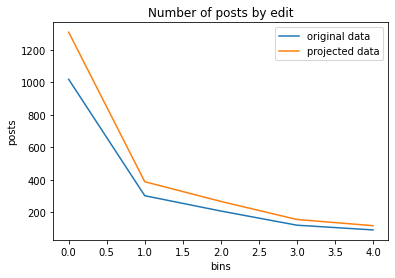

In [135]:
plt.plot(old,label='original data')
plt.plot(new, label='projected data')
plt.ylabel('posts')
plt.xlabel('bins')
plt.title('Number of posts by edit')
plt.legend()

In [144]:
SDE29 = SDE[(SDE['POSTING_START']>='2020-03-29') & (SDE['POSTING_START']<'2020-03-30')]

In [146]:
SDE29.sort_values('POSTING_START')

,PROCESS,WORK_ORDER_NAME,NUMBER_OF_EDITS,POSTING_START,duration,dur_per_edit
4405,SDE,SDE.50700,100.0,2020-03-29 00:00:00,74.0,0.740000
10134,SDE,SDE.54754,247.0,2020-03-29 00:02:00,68.0,0.275304
11251,SDE,SDE.55711,318.0,2020-03-29 00:03:00,76.0,0.238994
3692,SDE,SDE.50168,377.0,2020-03-29 00:04:00,75.0,0.198939
10023,SDE,SDE.54674,410.0,2020-03-29 00:05:00,75.0,0.182927
...,...,...,...,...,...,...
2065,SDE,SDE.20550,1999.0,2020-03-29 23:56:00,51.0,0.025513
2169,SDE,SDE.21466,1475.0,2020-03-29 23:57:00,48.0,0.032542
2735,SDE,SDE.21941,2199.0,2020-03-29 23:58:00,53.0,0.024102
2432,SDE,SDE.21707,226.0,2020-03-29 23:59:00,43.0,0.190265


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bda0588>]],
      dtype=object)

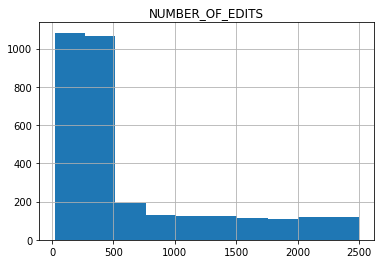

In [147]:
SDE29.hist('NUMBER_OF_EDITS')


In [149]:
def cat(val):
    if val < 500:
        return 500
    elif val < 1000 and val > 500:
        return 1000
    elif val < 2000 and val > 1000:
        return 2000
    elif val < 5000 and val > 2000:
        return 5000
    else:
        return 10000

In [150]:
SDE29['Group'] = SDE29.NUMBER_OF_EDITS.apply(cat)

/Users/jennetta/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [151]:
SDE29

,PROCESS,WORK_ORDER_NAME,NUMBER_OF_EDITS,POSTING_START,duration,dur_per_edit,Group
122,SDE,SDE.13484,750.0,2020-03-29 03:00:00,62.0,0.082667,1000
123,SDE,SDE.13486,623.0,2020-03-29 03:01:00,61.0,0.097913,1000
124,SDE,SDE.13487,956.0,2020-03-29 04:02:00,64.0,0.066946,1000
125,SDE,SDE.13489,2089.0,2020-03-29 03:31:00,66.0,0.031594,5000
126,SDE,SDE.13490,1841.0,2020-03-29 03:17:00,64.0,0.034764,2000
...,...,...,...,...,...,...,...
12040,SDE,SDE.56629,66.0,2020-03-29 15:18:00,13.0,0.196970,500
12041,SDE,SDE.56630,40.0,2020-03-29 15:21:00,13.0,0.325000,500
12042,SDE,SDE.56631,140.0,2020-03-29 15:20:00,14.0,0.100000,500
12044,SDE,SDE.56634,84.0,2020-03-29 13:54:00,26.0,0.309524,500


In [154]:
SDE29.Group

array([ 1000,  5000,  2000,   500, 10000])

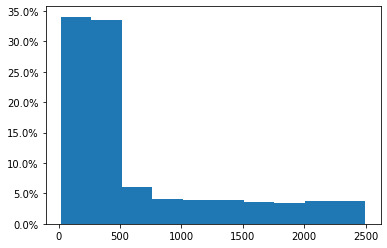

In [158]:
from matplotlib.ticker import PercentFormatter

plt.hist(SDE29.NUMBER_OF_EDITS, weights=np.ones(len(SDE29.Group)) / len(SDE29.Group))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()